In [21]:
!pip install rasterio


In [22]:
import rasterio
import numpy as np
from rasterio.plot import show
from skimage.segmentation import slic
from skimage import img_as_float
import matplotlib.pyplot as plt

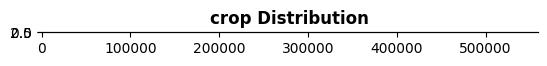

Crop type 1: Area = 101.81 hectares
Crop type 2: Area = 101.92 hectares
Crop type 3: Area = 101.90 hectares
Crop type 4: Area = 101.81 hectares
Crop type 5: Area = 101.85 hectares
Crop type 6: Area = 101.81 hectares
Crop type 7: Area = 101.92 hectares
Crop type 8: Area = 101.92 hectares
Crop type 9: Area = 101.80 hectares
Crop type 10: Area = 101.89 hectares
Crop type 11: Area = 101.92 hectares
Crop type 12: Area = 101.86 hectares
Crop type 13: Area = 101.96 hectares
Crop type 14: Area = 102.05 hectares
Crop type 15: Area = 101.86 hectares
Crop type 16: Area = 101.83 hectares
Crop type 17: Area = 101.88 hectares
Crop type 18: Area = 101.89 hectares
Crop type 19: Area = 102.01 hectares
Crop type 20: Area = 101.87 hectares
Crop type 21: Area = 101.91 hectares
Crop type 22: Area = 101.75 hectares
Crop type 23: Area = 101.88 hectares
Crop type 24: Area = 101.87 hectares
Crop type 25: Area = 101.95 hectares
Crop type 26: Area = 101.96 hectares
Crop type 27: Area = 101.85 hectares
Crop type 

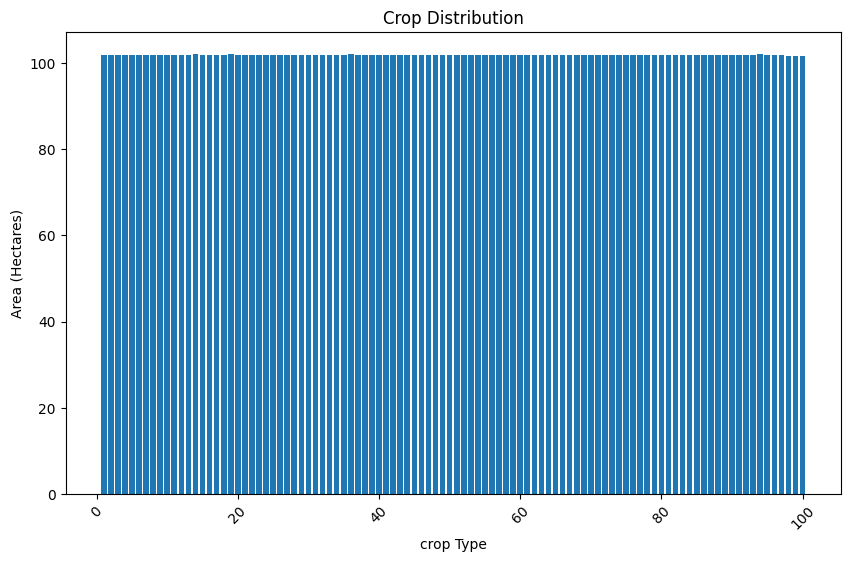

In [29]:

def crop_distribution_monitoring(image_path):
    # Read the GeoTIFF image
    with rasterio.open(image_path) as src:
        # Read the image as 3D array (bands, height, width)
        image = src.read()

		# convert the image  from 3D to 2D array (bands, height, width)-> (bands,height*width)
        image_reshaped = image.reshape(image.shape[0], -1,)

        # Perform image segmentation using SLIC (Simple Linear Iterative Clustering)
        # Adjust the n_segments parameter based on the expected number of crops in the image
        segments = slic(image_reshaped, n_segments=100, compactness=5, sigma=2,channel_axis = None)

        # Find the area of each segment (crop region) in the image
        segment_areas = [np.sum(segments == segment_id) for segment_id in np.unique(segments)]

        # Find the unique crop regions present in the image
        unique_crop_types = np.unique(segments)

        # Calculate the area of each unique crop type in hectares (1 hectare = 10000 square meters)
        # Pixel size in meters
        pixel_size_meters = src.res[0]  # Assuming the same pixel size in x and y directions
        pixel_size_hectares = (pixel_size_meters *0.0001)  # Convert pixel size to hectares
        crop_type_areas = [area * pixel_size_hectares for area in segment_areas]

        # Display the segmented image (optional)
        show(segments, cmap="tab20b",title='crop Distribution')

        # Print crop type and its corresponding area in hectares
        for i, crop_type in enumerate(unique_crop_types):
            print(f"Crop type {crop_type}: Area = {crop_type_areas[i]:.2f} hectares")
        plt.figure(figsize=(10,6))
        plt.bar(unique_crop_types,crop_type_areas)
        plt.xlabel('crop Type')
        plt.ylabel('Area (Hectares)')
        plt.title('Crop Distribution')
        plt.xticks(rotation=45)
        plt.show()



if __name__ == "__main__":
    # Provide the satellite image file path
    image_path = "/content/Delhi.tiff"
    crop_distribution_monitoring(image_path)


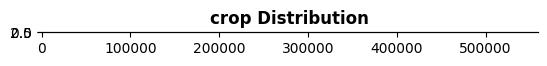

Crop type 1: Area = 1019.21 hectares
Crop type 2: Area = 1018.20 hectares
Crop type 3: Area = 1018.82 hectares
Crop type 4: Area = 1018.72 hectares
Crop type 5: Area = 1018.75 hectares
Crop type 6: Area = 1018.82 hectares
Crop type 7: Area = 1018.77 hectares
Crop type 8: Area = 1018.90 hectares
Crop type 9: Area = 1018.66 hectares
Crop type 10: Area = 1018.73 hectares


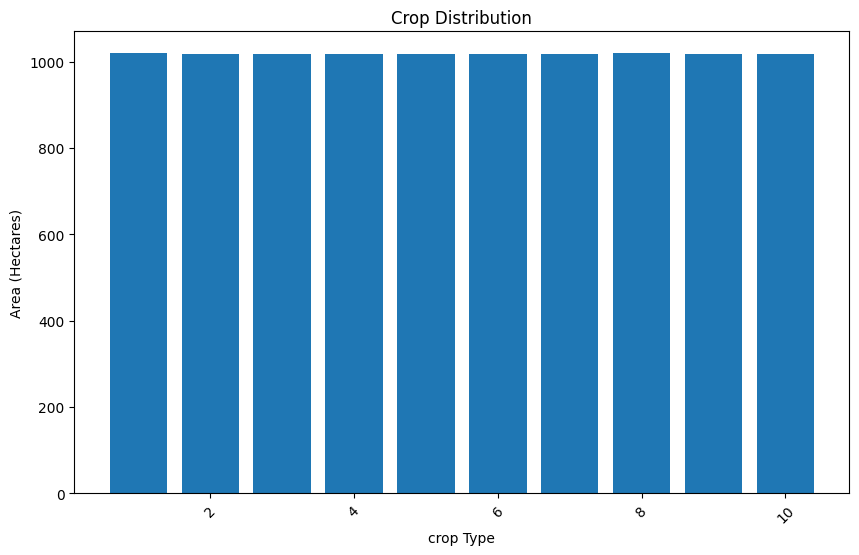

In [27]:

def crop_distribution_monitoring(image_path):
    # Read the GeoTIFF image
    with rasterio.open(image_path) as src:
        # Read the image as 3D array (bands, height, width)
        image = src.read()

		# convert the image  from 3D to 2D array (bands, height, width)-> (bands,height*width)
        image_reshaped = image.reshape(image.shape[0], -1,)

        # Perform image segmentation using SLIC (Simple Linear Iterative Clustering)
        # Adjust the n_segments parameter based on the expected number of crops in the image
        segments = slic(image_reshaped, n_segments=10, compactness=5, sigma=2,channel_axis = None)

        # Find the area of each segment (crop region) in the image
        segment_areas = [np.sum(segments == segment_id) for segment_id in np.unique(segments)]

        # Find the unique crop regions present in the image
        unique_crop_types = np.unique(segments)

        # Calculate the area of each unique crop type in hectares (1 hectare = 10000 square meters)
        # Pixel size in meters
        pixel_size_meters = src.res[0]  # Assuming the same pixel size in x and y directions
        pixel_size_hectares = (pixel_size_meters *0.0001)  # Convert pixel size to hectares
        crop_type_areas = [area * pixel_size_hectares for area in segment_areas]

        # Display the segmented image (optional)
        show(segments, cmap="tab20b",title='crop Distribution')

        # Print crop type and its corresponding area in hectares
        for i, crop_type in enumerate(unique_crop_types):
            print(f"Crop type {crop_type}: Area = {crop_type_areas[i]:.2f} hectares")
        plt.figure(figsize=(10,6))
        plt.bar(unique_crop_types,crop_type_areas)
        plt.xlabel('crop Type')
        plt.ylabel('Area (Hectares)')
        plt.title('Crop Distribution')
        plt.xticks(rotation=45)
        plt.show()



if __name__ == "__main__":
    # Provide the satellite image file path
    image_path = "/content/Delhi.tiff"
    crop_distribution_monitoring(image_path)
